In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import classification_report, accuracy_score

In [2]:
zoo = pd.read_csv("/content/Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
zoo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [5]:
zoo['type'].value_counts(normalize=True)

1    0.405941
2    0.198020
4    0.128713
7    0.099010
6    0.079208
3    0.049505
5    0.039604
Name: type, dtype: float64

imbalanced data set


In [6]:
zoo = zoo.drop('animal name', axis=1)
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
# separting target variable
x = zoo.iloc[:,:-1]
y = zoo.iloc[:,-1]

In [8]:
#standarizing the data
XScaled  = x.apply(zscore)
XScaled.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


In [9]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.33, random_state=42)

#BUILDING KNN MODEL

In [10]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

#Evaluating Performance of kNN Model

In [11]:
print("trainScore",NNH.score(X_train,y_train))
print("testScore",NNH.score(X_test,y_test))

trainScore 1.0
testScore 0.9117647058823529


In [12]:
print(classification_report(y_test,NNH.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         2
           5       0.67      1.00      0.80         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.91        34
   macro avg       0.74      0.81      0.76        34
weighted avg       0.88      0.91      0.89        34



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
scores =[]
for k in range(1,15):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

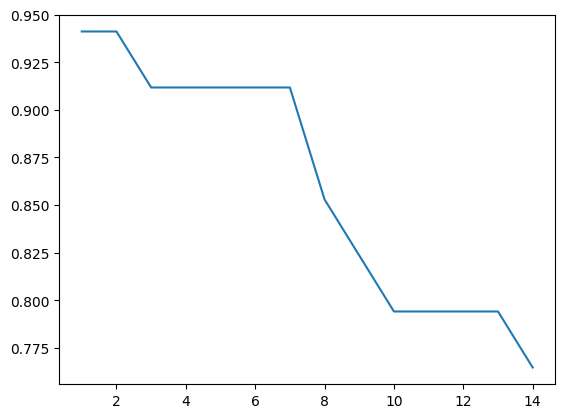

In [14]:
plt.plot(range(1,15),scores)

In [15]:
final_NNH = KNeighborsClassifier(n_neighbors= 2 , weights = 'distance' )
# Call Nearest Neighbour algorithm
final_NNH.fit(X_train, y_train)
print("trainScore",final_NNH.score(X_train,y_train))
print("testScore",final_NNH.score(X_test,y_test))

trainScore 1.0
testScore 0.9411764705882353


In [16]:
print(classification_report(y_test,final_NNH.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         3
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        34
   macro avg       0.93      0.88      0.88        34
weighted avg       0.96      0.94      0.94        34



# final_NNH model accuracy is 0.94 which is higher than previous model.
# most importantly final_NNH model f1 scores increased for class 3.